In [1]:
import damask
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())
damask3_template_path = "damask3/damask3_template"

The current directory is: 
c:\Users\springnuance\Desktop\Crystal-Plasticity-Journal-Project\damask3
Moving up to the parent directory
c:\Users\springnuance\Desktop\Crystal-Plasticity-Journal-Project


In [2]:
import damask
result = damask.Result('damask3/postprocess_test_hdf5/RVE_1_40_D_tensionX.hdf5')

In [35]:
material = "RVE_1_40_D"

In [3]:
# https://damask.mpie.de/documentation/examples/add_field_data.html
# add deformation gradient rate F and Piola–Kirchhoff stress P

result.add_stress_Cauchy('P','F')
result.add_strain('F','U')
result.add_strain('F','V')
result.add_strain('F_p','U')
result.add_strain("F_p",'V')

# Add the Mises equivalent of the Cauchy stress 'sigma'
# Add the Mises equivalent of the spatial logarithmic strain 'epsilon_V^0.0(F)'
result.add_equivalent_Mises('sigma')
result.add_equivalent_Mises('epsilon_V^0.0(F)')
result.add_equivalent_Mises('epsilon_U^0.0(F_p)')

# Add the total mobile and dipole dislocation density
result.add_calculation('np.sum(#rho_mob#,axis=1)','rho_mob_total','1/m²','total mobile dislocation density')
result.add_calculation('np.sum(#rho_dip#,axis=1)','rho_dip_total','1/m²','total dislocation dipole density')

result.add_stretch_tensor('F','U')
result.add_stretch_tensor('F','V')


# r.export_VTK()
# r_last = result.view(increments=-1)


 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


### The increment and time number

In [51]:
increments = result.increments_in_range(start=0,end=10e9)
print(increments)
print(len(increments))

times = result.times_in_range(start=0,end=10e9)
print(times)
print(len(times))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140]
41
[0.0, 4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0, 32.0, 36.0, 40.0, 66.0, 92.0, 118.0, 144.0, 170.0, 247.5, 325.0, 402.5, 480.0, 557.5, 635.0, 712.5, 790.0, 867.5, 945.0, 1022.5, 1100.0, 1177.5, 1255.0, 1332.5, 1410.0, 1487.5, 1565.0, 1642.5, 1720.0, 1780.0, 1840.0, 1900.0, 1960.0, 2020.0]
41


### Output fields of the hdf5 file

In [5]:
result

Created by /projappl/project_2004956/damask3/grid_solver/bin/DAMASK_grid v3.0.0-alpha7
        on 2023-05-24 20:45:28+0300
 executing "/projappl/project_2004956/damask3/grid_solver/bin/DAMASK_grid --load tensionX.yaml --geom RVE_1_40_D.vti"

increment_0 (0.0 s)
  phase
    Aluminum
      mechanical
        F / 1: deformation gradient
        F_e / 1: elastic deformation gradient
        F_p / 1: plastic deformation gradient
        L_p / 1/s: plastic velocity gradient
        O / q_0 (q_1 q_2 q_3): crystal orientation as quaternion
        P / Pa: first Piola-Kirchhoff stress
        U(F) / 1: right stretch tensor of F (deformation gradient)
        V(F) / 1: left stretch tensor of F (deformation gradient)
        epsilon_U^0.0(F) / 1: strain tensor of F (deformation gradient)
        epsilon_U^0.0(F_p) / 1: strain tensor of F_p (plastic deformation gradient)
        epsilon_U^0.0(F_p)_vM / 1: Mises equivalent strain of epsilon_U^0.0(F_p) (strain tensor of F_p (plastic deformation grad

In [31]:
F = np.array(list(result.get('F').values()))
print(F.shape) # (41, 64000, 3, 3). 64000 = 40 x 40 x 40 dimension of RVE

# Calculate the mean along the second dimension (number of pixels)
F = np.mean(F, axis=1)
print(F.shape) # (41, 3, 3)
# print(F_p)

epsilonV00F = np.array(list(result.get('epsilon_V^0.0(F)').values()))
print(epsilonV00F.shape) # (41, 64000, 3, 3)

# Calculate the mean along the second dimension (number of pixels)
epsilonV00F = np.mean(epsilonV00F, axis=1)
print(epsilonV00F.shape) # (41, 3, 3)

 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  10% ETA 0:00:00

(41, 64000, 3, 3)
(41, 3, 3)


 ██████████████████████████████████████████████████ 100% ETA 0:00:00


(41, 64000, 3, 3)
(41, 3, 3)


# Plot true stress-true strain curve

 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


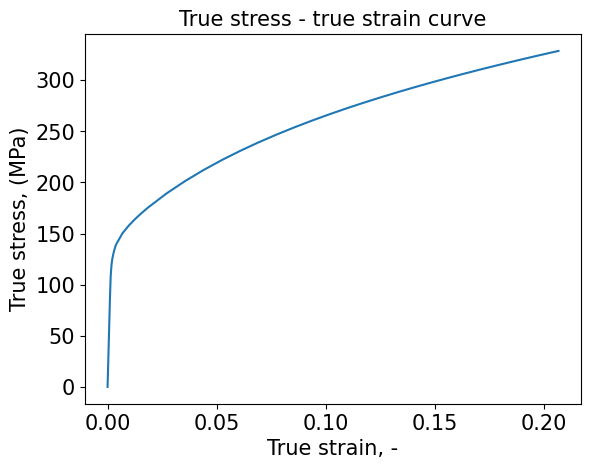

In [7]:
# True stress - true strain curve
trueStress = np.array([np.average(s) for s in result.get('sigma_vM').values()])  * 1e-6
trueStrain = np.array([np.average(e) for e in result.get('epsilon_V^0.0(F)_vM').values()])
# Increment 0 to 140, 40 points output plus increment 0 = 41 points
#print(len(trueStress))
#print(len(trueStrain))
size = 15
plt.title('True stress - true strain curve',fontsize=size)
plt.xlabel('True strain, -',fontsize=size)
plt.ylabel('True stress, (MPa)',fontsize=size)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.plot(trueStrain, trueStress)


# Plot R-value (Lankford coefficient)

 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


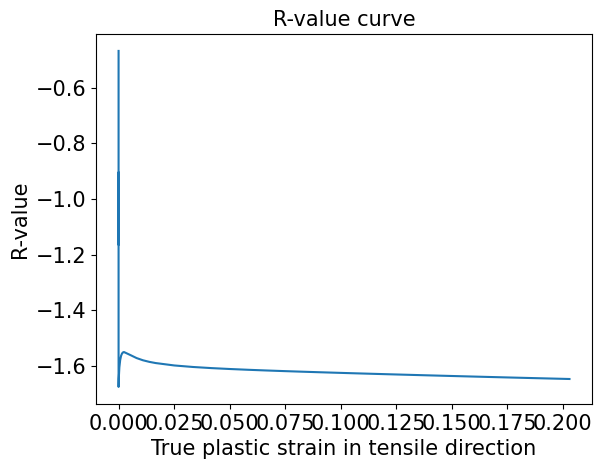

In [8]:
# Lankford coefficient - Plastic strain ratio curve - R-value
epsilon_avg = np.array([np.average(eps,0) for eps in result.get('epsilon_U^0.0(F_p)').values()])
Rvalue_coeff = epsilon_avg[:,1,1]/epsilon_avg[:,2,2]
Rvalue_strain = np.array([np.average(strain) for strain in result.get('epsilon_U^0.0(F_p)_vM').values()])
#print(len(Rvalue_coeff))
#print(len(Rvalue_strain))
size=15
plt.title("R-value curve",fontsize=size)
plt.xlabel("True plastic strain in tensile direction",fontsize=size)
plt.ylabel("R-value",fontsize=size)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.plot(Rvalue_strain, Rvalue_coeff)

 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


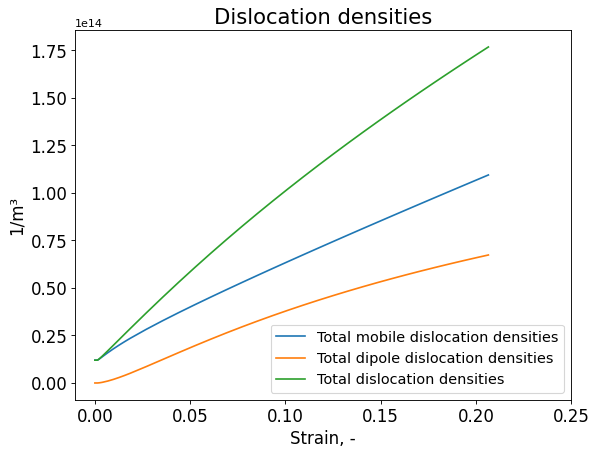

In [9]:
rho_mob_total = np.array([np.average(s) for s in result.get('rho_mob_total').values()])
rho_dip_total = np.array([np.average(s) for s in result.get('rho_dip_total').values()])
rho_total = rho_mob_total + rho_dip_total

trueStrain = [np.average(e) for e in result.get('epsilon_V^0.0(F)_vM').values()]
#print(epsilon)

size=15
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(trueStrain, rho_mob_total, label="Total mobile dislocation densities")
plt.plot(trueStrain, rho_dip_total, label="Total dipole dislocation densities")
plt.plot(trueStrain, rho_total, label="Total dislocation densities")

plt.title(f"Dislocation densities", size=size + 4)
plt.rc('xtick', labelsize=size)    
plt.rc('ytick', labelsize=size)  
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
plt.ylabel('1/m³', size=size)
plt.xlabel("Strain, -", size=size)
plt.legend(loc=4, fontsize=size - 2)

### Write postprocessing data to csv and xlsx fie format

In [43]:
# Create an empty DataFrame
df = pd.DataFrame()

df["inc"] = increments
df["time"] = times
df['r-value-coeff'] = Rvalue_coeff
df['r-value-strain'] = Rvalue_strain
df['rho_mob_total'] = rho_mob_total
df['rho_dip_total'] = rho_dip_total
df['rho_total'] = rho_total 
for i in range(3):
    for j in range(3):
        index = i * 3 + j + 1
        df[f'{index}_f'] = F[:,i,j]
    
for i in range(3):
    for j in range(3):
        index = i * 3 + j + 1
        df[f'{index}_ln(V)'] = epsilonV00F[:,i,j]

df["Mises(Cauchy)"] = trueStress
df["Mises(ln(V))"] = trueStrain

df

# Save DataFrame as XLSX file
xlsx_filename = f'damask3/postprocess_test_hdf5/{material}_tensionX.xlsx'
df.to_excel(xlsx_filename, index=False)

# Save DataFrame as CSV file
csv_filename = f'damask3/postprocess_test_hdf5/{material}_tensionX.txt'
df.to_csv(csv_filename, index=False, sep ='\t')